# Курсовая работа. 
*Pandas и Matplotlib*

**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность.

<br><br>
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет.
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_courses = pd.read_csv('/Users/maksimoshergin/for anaconda/courses.csv', index_col=[0])
df_course_content = pd.read_csv('/Users/maksimoshergin/for anaconda/course_contents.csv')
df_progress = pd.read_csv('/Users/maksimoshergin/for anaconda/progresses.csv')
df_progress_phase = pd.read_csv('/Users/maksimoshergin/for anaconda/progress_phases.csv', parse_dates=True, dayfirst=False)
df_students = pd.read_csv('/Users/maksimoshergin/for anaconda/students.csv') # загружаем датасеты

main = pd.merge(df_progress_phase, df_progress, left_on='progress_id', right_on='id')
main = pd.merge(main, df_course_content, how='left', on=['course_id', 'module_number', 'lesson_number'])
main = main.merge(df_courses, left_on='course_id', right_on='id')
main = main.drop(['id_x', 'id_y'], axis=1) #объединяем данные в один датафрейм


In [3]:
courses = main['title'].nunique()
modules = main.groupby('title')['module_number'].nunique()
lessons = main.groupby(['title', 'module_number'])['lesson_title'].nunique().reset_index()
lessons_median = lessons.groupby('title')['lesson_title'].agg('median')
students = main.groupby('title')['student_id'].nunique()

In [10]:
from datetime import datetime
now = datetime.now()

age = df_students.merge(main, left_on='id', right_on='student_id').dropna()
age['birthday'] = pd.to_datetime(age['birthday'], errors='coerce')
age['age'] = (now - age['birthday']) / 365
age

,id_,id,city,birthday,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,title,field,age
17,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,1,2,done,2018-05-02 20:33:28.700864+00,2018-05-02 20:34:12.55053+00,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701,Вводный модуль,Какие бывают программы?,5bc43fee-3cb7-46e0-950c-8191ebb1e4da,True,False,Java-разработчик,Development,29 days 15:22:03.732184715
18,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,da26551a71cd62bbab844e3e54af7f71,1,1,done,2018-02-20 07:31:59.678116+00,2018-05-02 20:33:28.093842+00,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701,Вводный модуль,Введение,e15d485d-f3cd-4b1a-a675-59d322c53542,True,False,Java-разработчик,Development,29 days 15:22:03.732184715
21,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,3,1,done,2018-04-26 13:34:01.843239+00,2018-05-19 16:04:44.522454+00,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9,Базовые знания о типографике. Практика Photoshop,Урок. Базовые знания о типографике,2adfc9cd-701a-46e8-86b8-d185999a6e5f,True,False,Веб-дизайн Базовый,Design,33 days 14:50:30.033554578
22,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,11,1,done,2018-11-28 23:59:53.983098+00,2019-02-25 09:33:05.283413+00,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9,Интерактивные элементы. Практика Photoshop,"Слайдеры, галереи, анимации",42cd1f69-082d-4b73-9fc5-db6cdb85a567,True,False,Веб-дизайн Базовый,Design,33 days 14:50:30.033554578
23,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,5ead083521d7f2284a43290c743aa93b,7,6,done,2018-09-20 11:49:47.581875+00,2018-09-22 17:48:24.017382+00,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9,Формы и кнопки. Практика Photoshop,Кнопки,810cea20-653f-4b15-a07f-f0248dc0303c,True,False,Веб-дизайн Базовый,Design,33 days 14:50:30.033554578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350612,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,fdae5589fcb77cb4e0ec641a6d1b8c48,1,4,done,2019-07-08 17:02:58.234835+00,2019-07-08 21:44:17.507751+00,859b49d2953c191275061f41f1ba09be,e9bb9205eeed307ee7cbaa08bfd166c3,Знакомство с языком,"Hello, world!",73315f69-8587-4f46-ab6b-fe57c8f1aa52,True,False,JavaScript с нуля,Development,31 days 06:05:47.293828550
350613,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,fdae5589fcb77cb4e0ec641a6d1b8c48,1,2,done,2019-07-08 16:36:14.711678+00,2019-07-08 16:47:43.473642+00,859b49d2953c191275061f41f1ba09be,e9bb9205eeed307ee7cbaa08bfd166c3,Знакомство с языком,Что умеет JavaScript и почему он так популярен?,6af5b93a-593b-48a0-bb03-42fa2571ede5,True,False,JavaScript с нуля,Development,31 days 06:05:47.293828550
350614,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,fdae5589fcb77cb4e0ec641a6d1b8c48,1,1,done,2019-07-06 11:55:43.330743+00,2019-07-08 16:26:32.027971+00,859b49d2953c191275061f41f1ba09be,e9bb9205eeed307ee7cbaa08bfd166c3,Знакомство с языком,Интро,0d4678b0-abfe-4132-9193-97f9b0f08d3a,True,False,JavaScript с нуля,Development,31 days 06:05:47.293828550
350615,119731,859b49d2953c191275061f41f1ba09be,Краснодар,1990-01-03,fdae5589fcb77cb4e0ec641a6d1b8c48,1,3,done,2019-07-08 16:47:43.495539+00,2019-07-08 17:02:58.211735+00,859b49d2953c191275061f41f1ba09be,e9bb9205eeed307ee7cbaa08bfd166c3,Знакомство с языком,Инструменты разработчика,460c54ea-d899-44d3-8940-00302ff5f2e5,True,False,JavaScript с нуля,Development,31 days 06:05:47.293828550


<AxesSubplot:xlabel='title'>

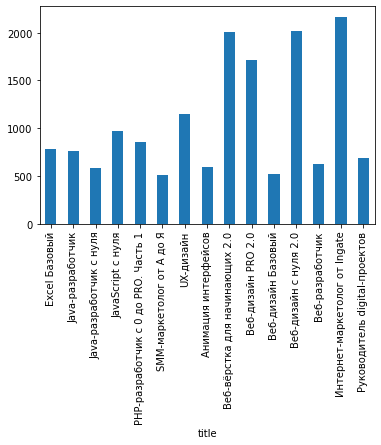

In [43]:
students.plot.bar()

## Вывод по п.1
В датасете всего 15 курсов, состоящих минимум из 9, и максимум из 21 модуля. Модули содержат от 1 до 29 уроков. Медианное значение количества уроков в модуле по каждому курсу составляет от 2 до 10 уроков. Количество студентов на курсе варьируется в промежутке от 518 до 2168 человек.



## 2. Расчет потенциальной нагрузки на преподавателей

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [11]:
main['start_date'] = pd.to_datetime(main['start_date'])
main['finish_date'] = pd.to_datetime(main['finish_date'])
main['y_m'] = main['start_date'].apply(lambda x: x.strftime('%Y-%m'))
# приводим столбцы с датами к нужному формату и добавляем столбец с месяцем и годом начала выполнения дз

main2_1 = main[main['is_homework'] == True] # выбираем уроки, которые являются домашним заданием

#находим номера модулей, в которых содержится первая домашняя работа
first_hw = pd.DataFrame(main2_1.groupby('title')['module_number'].agg('min')) 
first_hw.columns = ['mod_wth_first_hw']
# Объединяем с основным дф и оставляем только строки с первым дз
main2_1 = main2_1.merge(first_hw, on='title')
main2_1 = main2_1[main2_1['module_number'] == main2_1['mod_wth_first_hw']]

main2_1 = main2_1.groupby(['title', 'y_m'])['student_id'].nunique().reset_index()
# получаем дф с количеством студентов, начавших выполнять первое дз по каждому курсу и месяцу
main2_1


,title,y_m,student_id
0,Excel Базовый,2018-02,6
1,Excel Базовый,2018-03,3
2,Excel Базовый,2018-05,3
3,Excel Базовый,2018-06,9
4,Excel Базовый,2018-07,13
...,...,...,...
239,Руководитель digital-проектов,2019-03,36
240,Руководитель digital-проектов,2019-04,17
241,Руководитель digital-проектов,2019-05,25
242,Руководитель digital-проектов,2019-06,15


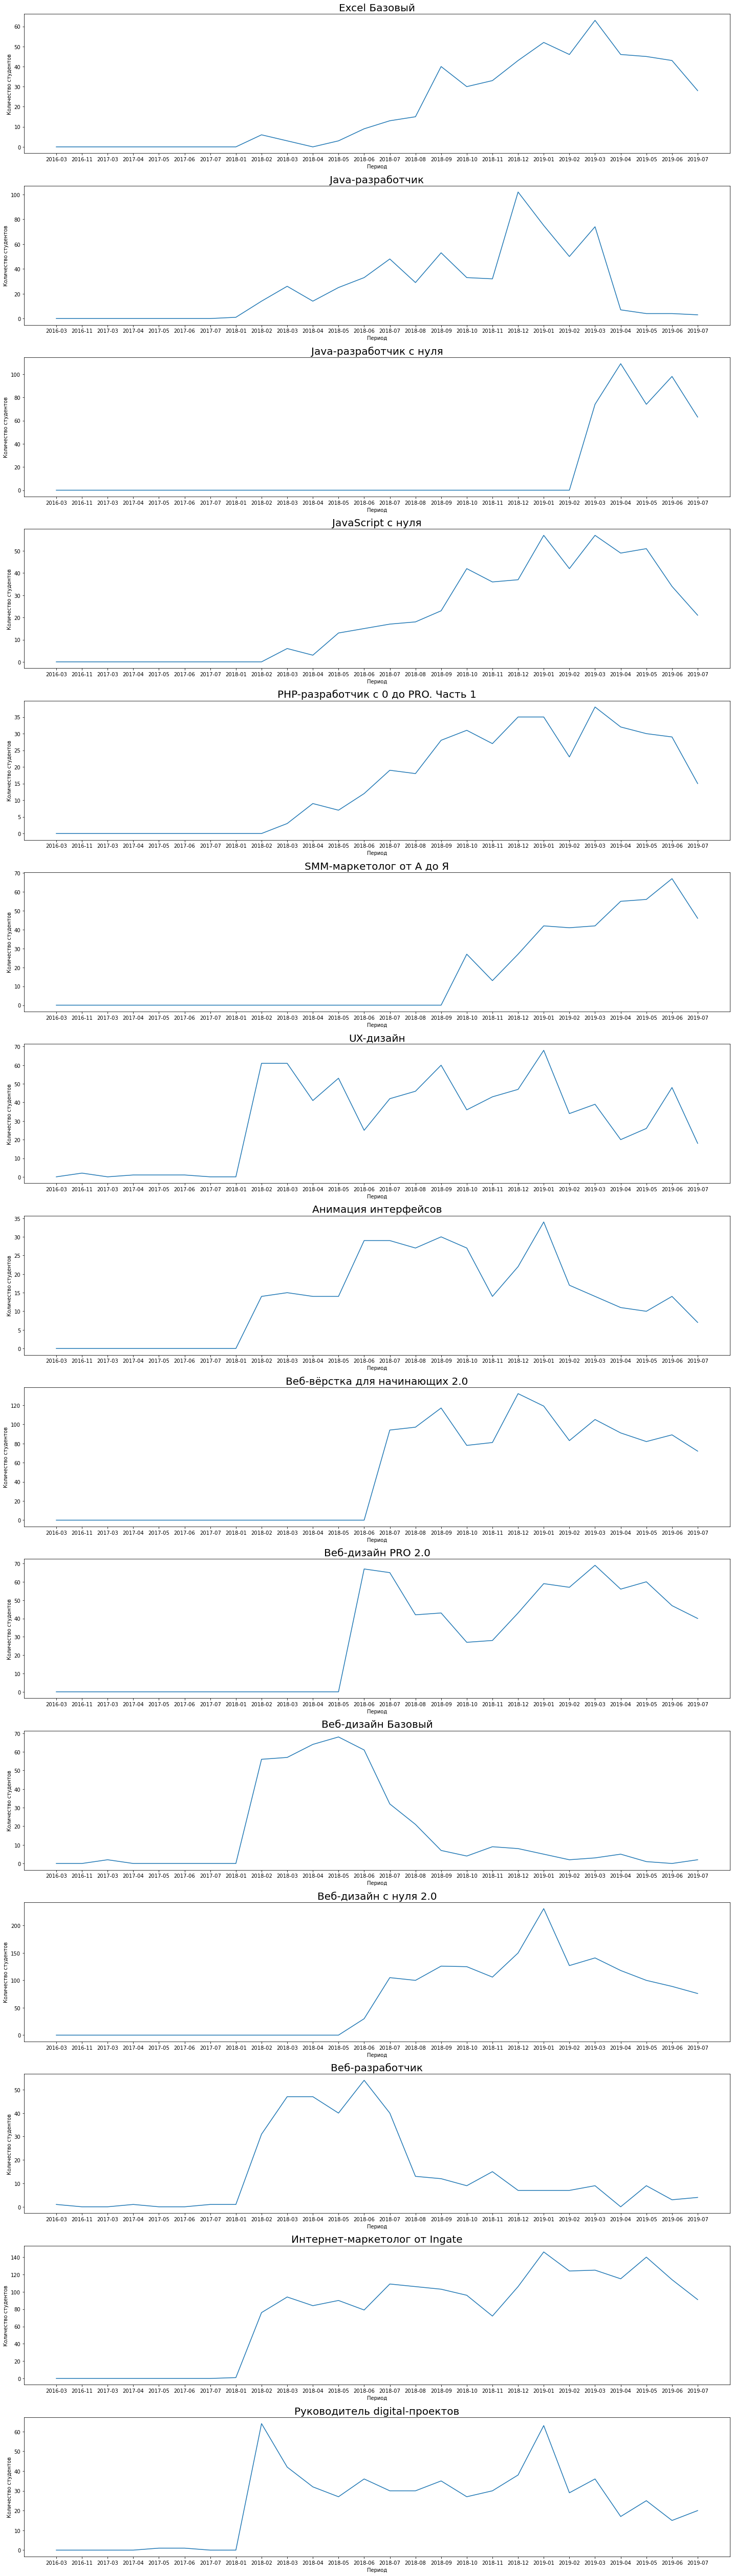

In [12]:
# построим графики прироста сутдентов для каждого курса

main2_2 = main2_1.pivot(index='y_m', columns='title', values='student_id')
main2_2 = main2_2.fillna(0)
col_list = list(main2_2.columns)

fig, axes = plt.subplots(15, 1, figsize=(20,70))

count = 0
for name, group in enumerate(col_list):
    axes[count].plot(main2_2.index, main2_2[group])
    axes[count].set_title('{}'.format(col_list[name]), fontsize=20)
    count += 1
plt.setp(axes, xlabel='Период', ylabel='Количество студентов')
plt.tight_layout()
plt.show()

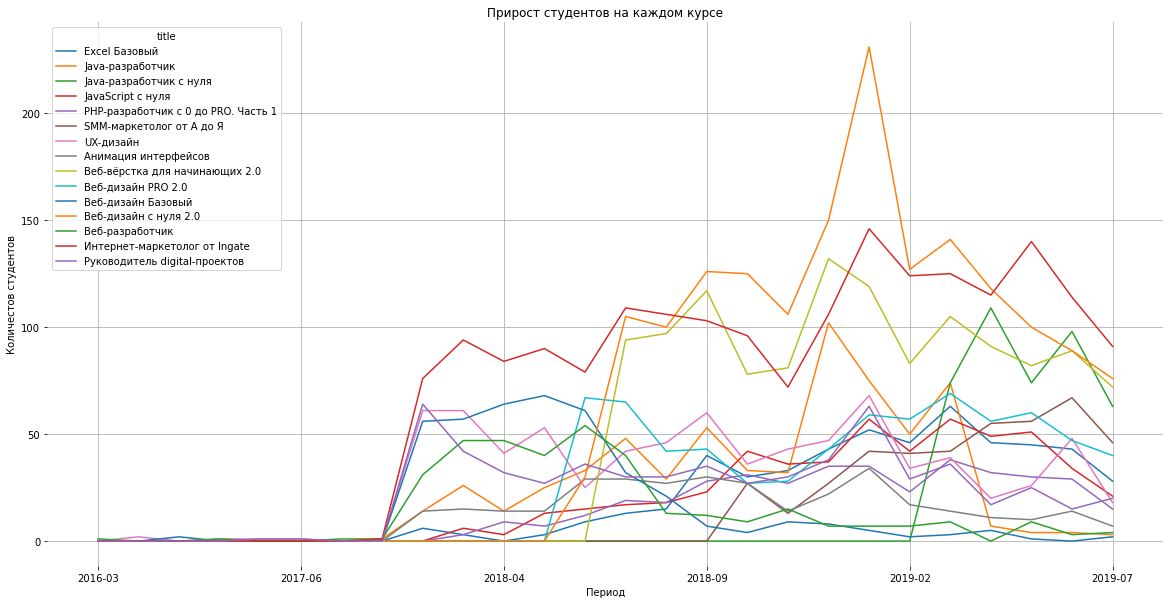

In [13]:
# построим общий график прироста студентов по каждому курсу

main2_3 = main2_1.pivot(index='y_m', columns='title', values='student_id')
main2_3 = main2_3.fillna(0)

main2_3.plot(figsize=(20,10), grid=True)
plt.xlabel('Период')
plt.ylabel('Количестов студентов')
plt.title('Прирост студентов на каждом курсе')
plt.box(False)
plt.show()

In [14]:
# расчет количества прогрессов
import numpy as np

main2_4 = main[main['is_homework'] == True] 
main2_4['finish_ym'] = main2_4['finish_date'].apply(lambda x: x.strftime('%Y-%m'))
# были отобраны только дз и добавляем столбец с датой завершения дз

main2_4 = main2_4[main2_4['status'] == 'done']

main24 = main2_4.groupby('title').apply(lambda title: \
                               title.apply(lambda x: \
                                           pd.Series(1, index=pd.date_range(x['y_m'], x['finish_ym'], closed=None, freq='MS')) \
                                                        , axis=1) \
                               .sum(axis=0)) \
.reset_index(level=0).pivot(columns='title', values=0) \
.reindex(pd.date_range(main2_4.y_m.min(), main2_4.finish_ym.max(), freq='MS'), fill_value=np.nan)
# для каждой строчки в столбце тайтл код считает разницу между датой начала и датой завершения дз, после чего
# создается сводная таблица с данными о количестве выполненных работ, а пропуски заполняются NaN

<ipython-input-14-a49488ab9129>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main2_4['finish_ym'] = main2_4['finish_date'].apply(lambda x: x.strftime('%Y-%m'))


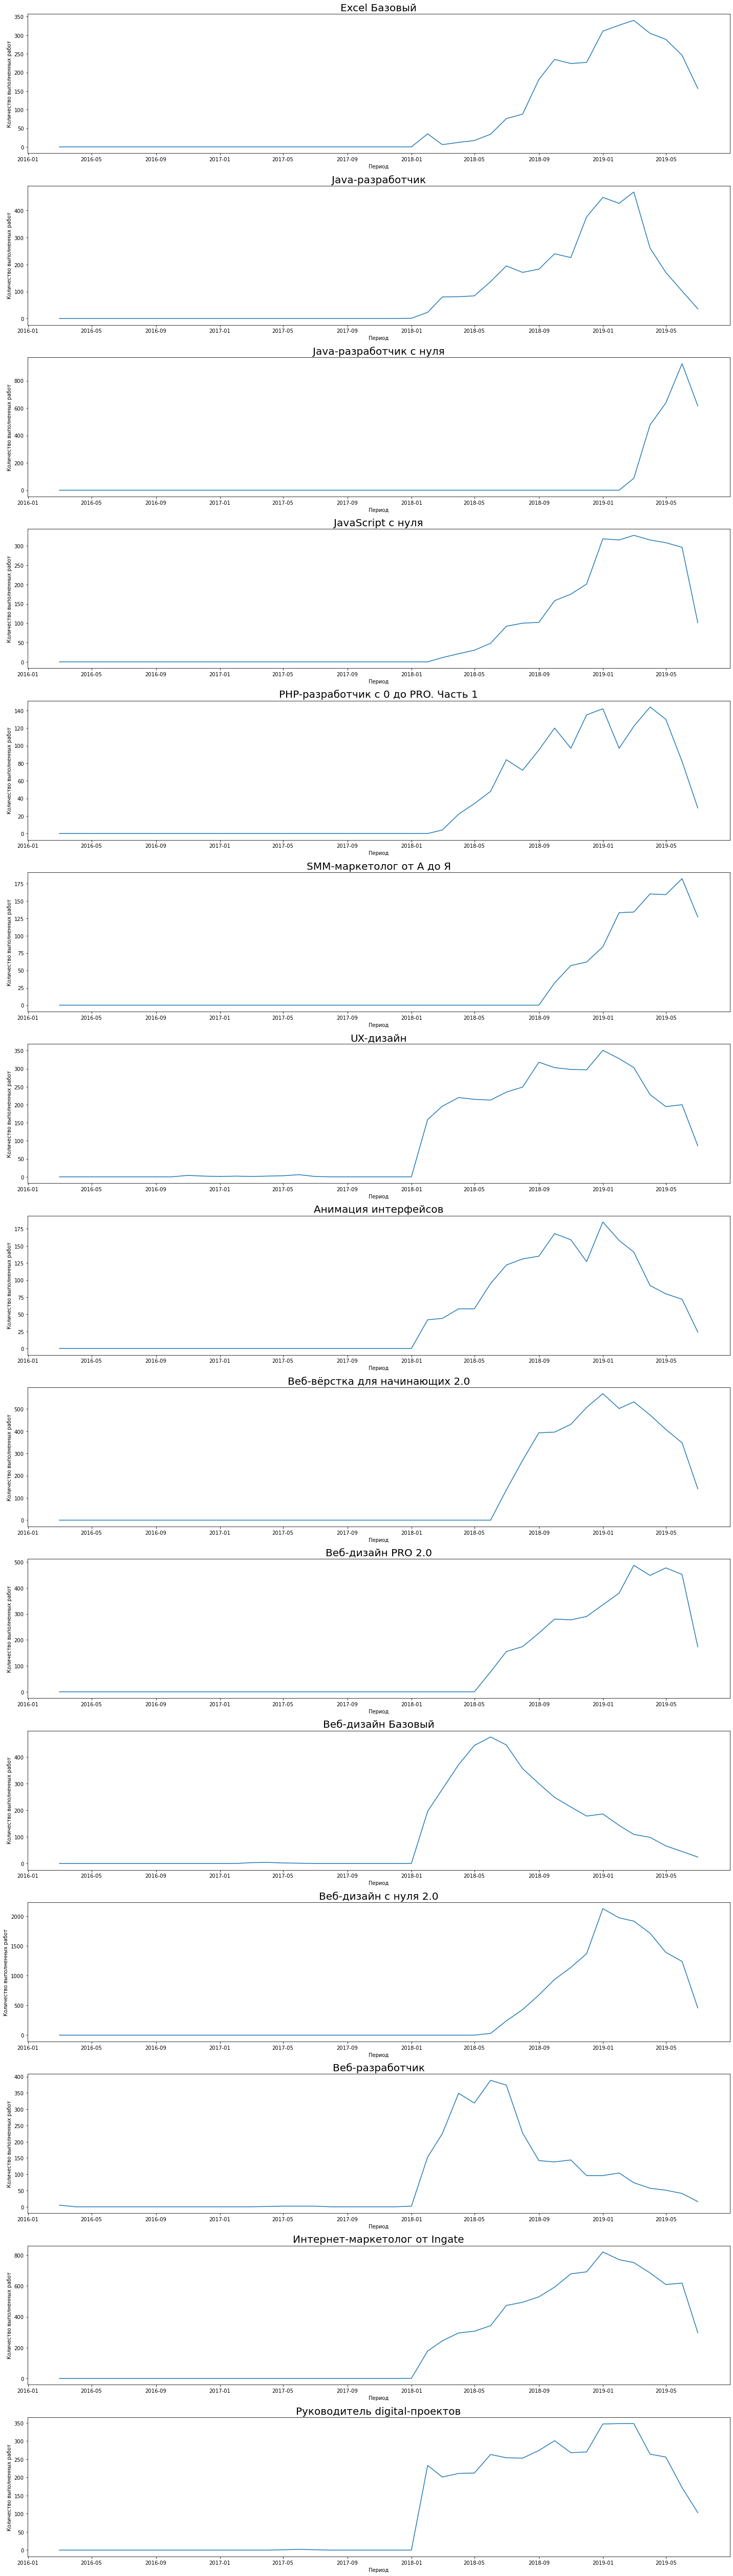

In [15]:
main2_5 = main24.unstack() 
main2_5 = pd.DataFrame(main2_5).reset_index().fillna(0) # превращаем сводную таблицу в датафрейм
main2_5.columns = ['title', 'period', 'count'] # задаем имена столбцов дф
main2_5 = main2_5.groupby('title') # отрисовываем графики для каждого курса
fig, axes = plt.subplots(15, 1, figsize=(20,70))
count = 0
for name, group in main2_5:
    axes[count].plot(group['period'], group['count'])
    axes[count].set_title('{}'.format(name), fontsize=20)
    count += 1
plt.setp(axes, xlabel='Период', ylabel='Количество выполненных работ')
plt.tight_layout()
plt.show()

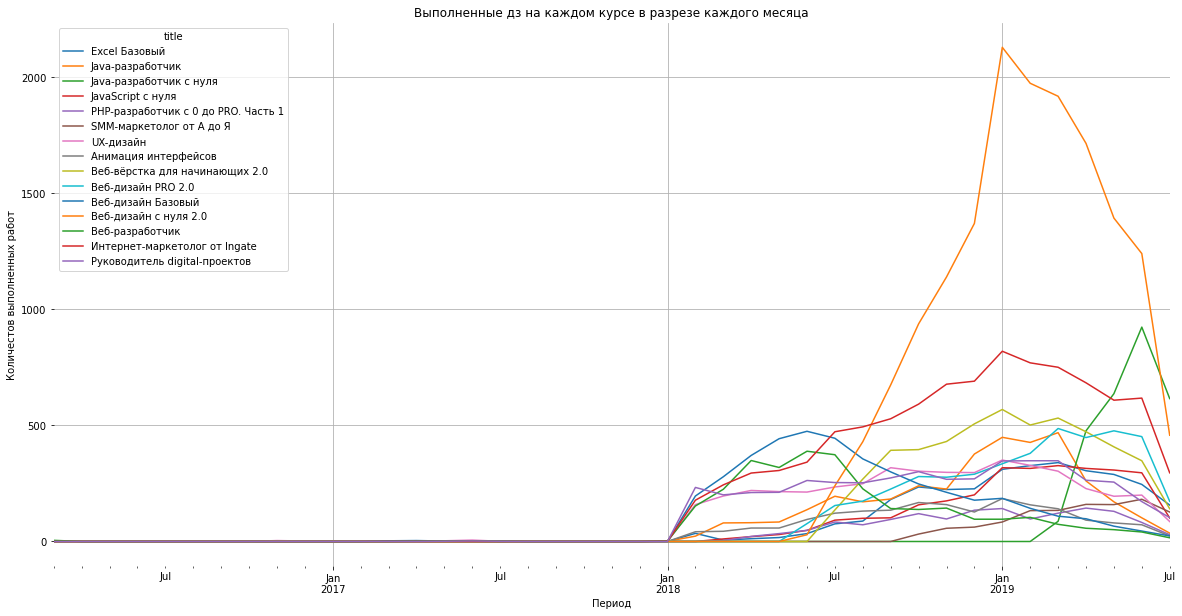

In [16]:
main24 = main24.fillna(0)

main24.plot(figsize=(20,10), grid=True)
plt.xlabel('Период')
plt.ylabel('Количестов выполненных работ')
plt.title('Выполненные дз на каждом курсе в разрезе каждого месяца')
plt.box(False)
plt.show()

## Вывод по п.2

Наибольшее количество новых студентов было зафиксировано на курсе «Веб-дизайн с нуля 2.0» в январе 2019 года, после чего прирост стал уменьшаться и стремиться к средним значениям по всем курсам в целом. Также хороший прирост студентов был отмечен на курсе «Интернет-маркетолог от Ingate» в период с января по май 2019 года. 
Резкое падение количества студентов произошло на курсах «Веб-разработчик» и «Веб-дизайн Базовый» после пиков в мае-июне 2018 года. Это падение может быть обусловлено запуском маркетинговых акций или улучшения наполнения курса «Веб-дизайн с нуля 2.0».

Эти данные коррелируют с данными о количестве выполненных домашних работ на этих же курсах за тот же период времени. Общее количество выполняемых домашних работ резко возрастает в период с июля 2018 по январь 2019 года, за исключением курсов «Веб-разработчик» и «Веб-дизайн Базовый», т.к. количество студентов на этом курсе резко упало к июлю 2018 года.

Таким образом мы можем утверждать, что новые студенты достаточно быстро приступают к выполнению домашних работ, что приводит к повышению нагрузки на проверяющих преподавателей. 


## 3. Выявление проблемных модулей

1.  Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2.  На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда).
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [17]:
main3_1 = main[main['is_homework'] == True]
main3_1 = main3_1[main3_1['status'] == 'done'] 
main3_1 = main3_1[main3_1['finish_date'] > main3_1['start_date']] # фильтруем основной дф

main3_1['duration'] = main3_1['finish_date'] - main3_1['start_date'] # исключаем возможные отрицательные значения

# считаем минимальные, максимальные, медианные и средние значения для каждого модуля
result3_1 = main3_1.groupby(['title', 'module_number'])['duration'].median(numeric_only=False).reset_index()
result3_1['median'] = result3_1['duration'] 
result3_1['mean'] = main3_1.groupby(['title', 'module_number'])['duration'].mean(numeric_only=False).reset_index()['duration']
result3_1['min'] = main3_1.groupby(['title', 'module_number'])['duration'].min().reset_index()['duration']
result3_1['max'] = main3_1.groupby(['title', 'module_number'])['duration'].max().reset_index()['duration']
result3_1 = result3_1.drop(['duration'], axis=1)
result3_1
# считаем минимальные, максимальные, медианные и средние значения для каждого модуля
#median3_1 = main3_1.groupby(['title', 'module_number'])['duration'].median(numeric_only=False).reset_index()
#median3_1.columns = ['title', 'module_number', 'median']
#mean3_1 = main3_1.groupby(['title', 'module_number'])['duration'].mean(numeric_only=False).reset_index()
#mean3_1.columns = ['title', 'module_number', 'mean']
#min_max3_1 = main3_1.groupby(['title', 'module_number'])['duration'].agg(['min', 'max']).reset_index()

# объединяем полученные метрики в один датафрейм
#result3_1 = pd.merge(median3_1, mean3_1, on=['title', 'module_number'])
#result3_1 = result3_1.merge(min_max3_1, on=['title', 'module_number'])
#result3_1.describe()

,title,module_number,median,mean,min,max
0,Excel Базовый,1,2 days 07:56:55.715077500,6 days 01:03:55.201511079,0 days 00:52:49.101080,183 days 17:57:52.247793
1,Excel Базовый,2,1 days 20:57:26.256583,4 days 08:22:23.940379933,0 days 00:53:46.720239,184 days 06:27:48.841839
2,Excel Базовый,3,1 days 12:14:41.442344,3 days 10:46:33.700404091,0 days 00:28:21.958252,89 days 03:11:50.758958
3,Excel Базовый,4,3 days 06:06:38.675476,11 days 00:52:27.254254364,0 days 01:45:43.006464,327 days 13:09:58.465046
4,Excel Базовый,5,3 days 02:03:42.691376500,7 days 10:54:43.013561834,0 days 01:22:41.490445,175 days 13:10:49.724595
...,...,...,...,...,...,...
185,Руководитель digital-проектов,12,7 days 22:15:52.628980,23 days 02:18:21.878687246,0 days 00:00:00.001770,211 days 13:38:10.145467
186,Руководитель digital-проектов,13,13 days 19:08:01.208274500,28 days 23:54:58.857109179,0 days 00:00:00.001537,246 days 20:15:03.960003
187,Руководитель digital-проектов,14,8 days 21:15:36.368612,16 days 10:29:00.685754017,0 days 00:00:00.002027,199 days 03:15:55.467643
188,Руководитель digital-проектов,15,2 days 20:03:22.659668,7 days 10:32:25.744683456,0 days 00:00:00.003103,132 days 04:58:36.764804


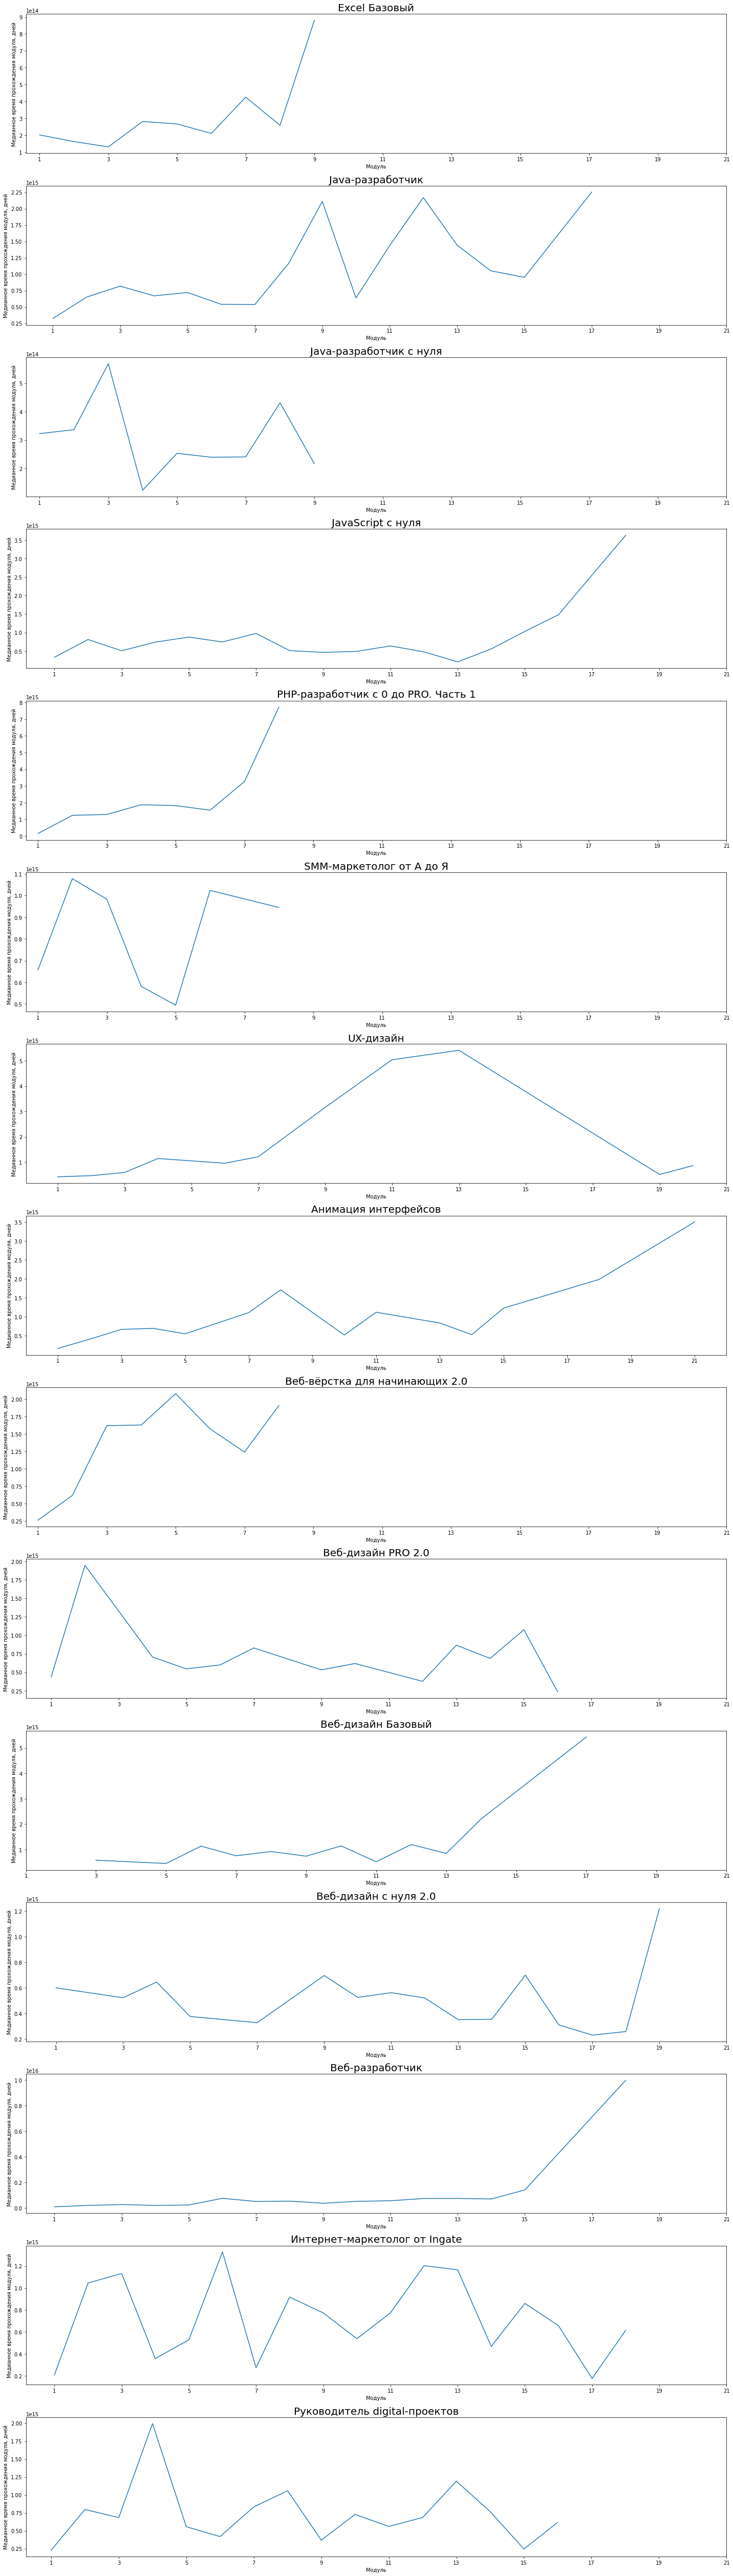

In [18]:
median3_1 = main3_1.groupby(['title', 'module_number'])['duration'].median(numeric_only=False).reset_index()
median3_1.columns = ['title', 'module_number', 'median']
# отрисовываем графики медианного времени сдачи дз для каждого курса
main3_2 = median3_1.groupby('title')

# создаем единую ось х для всех графиков
xticks = list(range(1, median3_1['module_number'].max() + 1, 2))

fig, axes = plt.subplots(15, 1, figsize=(20,70))
count = 0
for name, group in main3_2:
    axes[count].plot(group['module_number'], group['median'])
    axes[count].set_title('{}'.format(name), fontsize=20)
    axes[count].set_xticks(xticks)
    count += 1
plt.setp(axes, xlabel='Модуль', ylabel='Медианное время прохождения модуля, дней')
plt.tight_layout()
plt.show()

In [19]:
# фильтруем основной датасет по аналогии с предыдущим заданием и добавляем столбец с месяцем окончания выполнения дз
main3_3 = main[(main['is_homework'] == True) & (main['status'] == 'done')]
main3_3['finish_m'] = main['finish_date'].apply(lambda x: x.strftime('%m'))
main3_3 = main3_3[main3_3['finish_date'] > main3_3['start_date']]
main3_3['duration'] = main3_3['finish_date'] - main3_3['start_date']

# получаем медианное время выполнения дз по месяцам для каждого курса
median3_3 = main3_3.groupby(['title', 'finish_m'])['duration'].median(numeric_only=False).reset_index()
median3_3.columns = ['title', 'finish_m', 'median']
median3_3

<ipython-input-19-a73a82ff6d82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main3_3['finish_m'] = main['finish_date'].apply(lambda x: x.strftime('%m'))


,title,finish_m,median
0,Excel Базовый,01,2 days 02:23:19.408905
1,Excel Базовый,02,2 days 10:33:54.148883
2,Excel Базовый,03,2 days 19:52:58.386801
3,Excel Базовый,04,1 days 21:12:39.180702
4,Excel Базовый,05,2 days 13:55:33.682246
...,...,...,...
166,Руководитель digital-проектов,08,14 days 11:08:56.364548500
167,Руководитель digital-проектов,09,13 days 16:21:38.270218
168,Руководитель digital-проектов,10,6 days 23:14:32.921133
169,Руководитель digital-проектов,11,5 days 18:27:20.997123


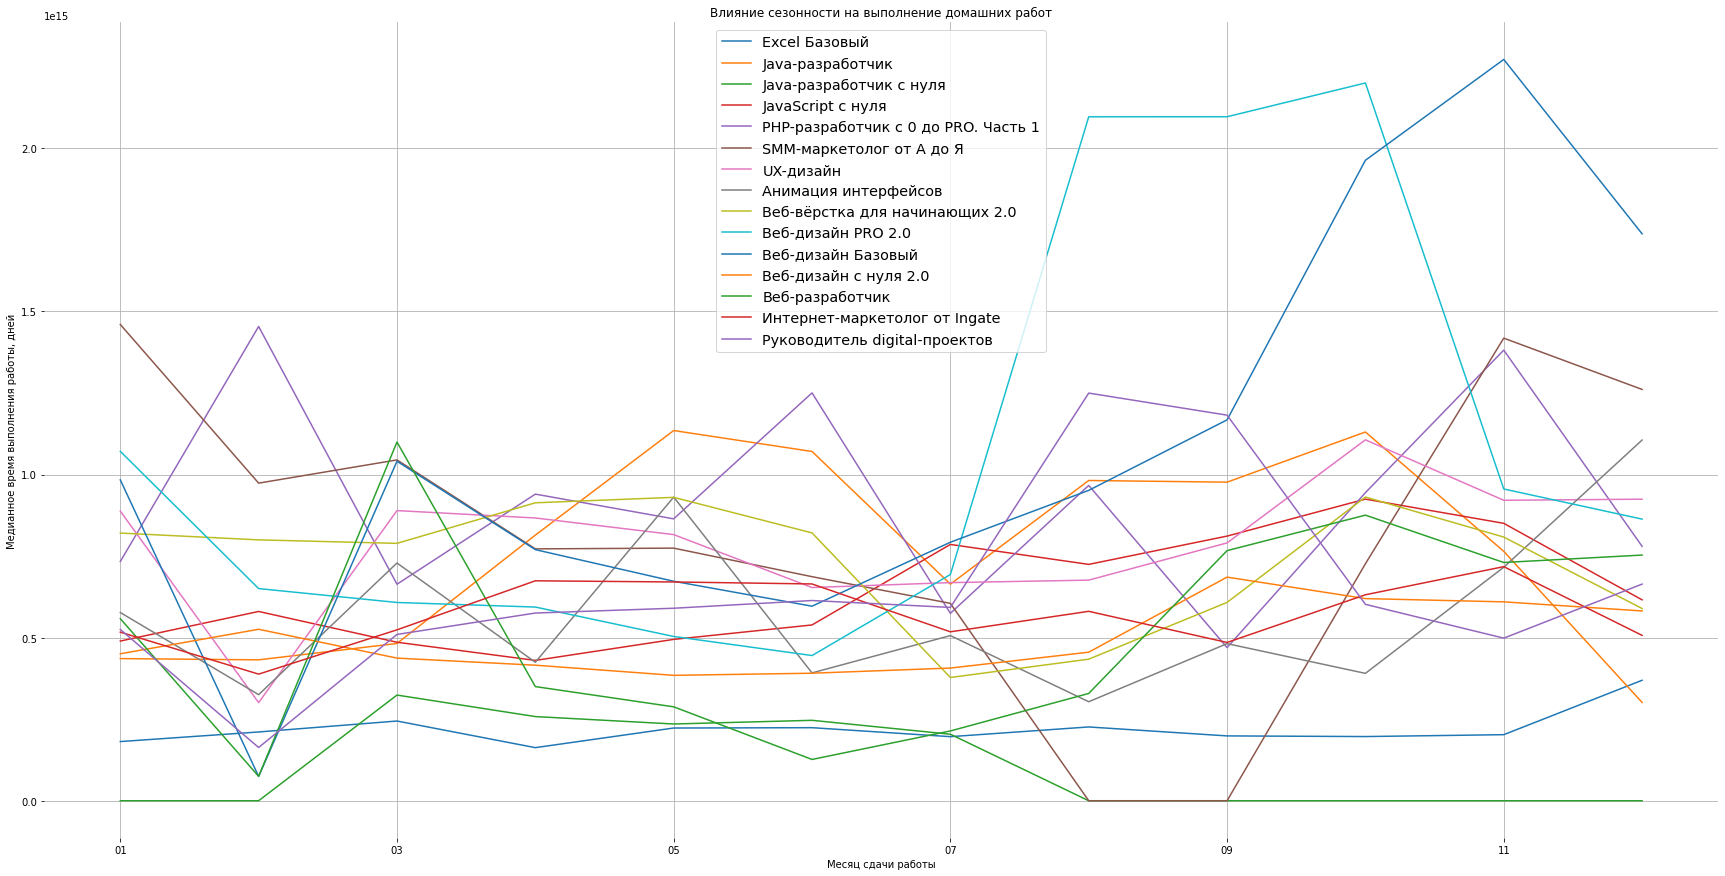

In [20]:
# отрисовываем график 
main3_4 = median3_3.pivot(index='finish_m', columns='title', values='median')
main3_4 = main3_4.fillna(pd.Timedelta(seconds=0)) # заполняем NaNы значениями 0 секунд

main3_4.plot(figsize=(30,15), grid=True)
plt.xlabel('Месяц сдачи работы')
plt.ylabel('Медианное время выполнения работы, дней')
plt.title('Влияние сезонности на выполнение домашних работ')
plt.box(False)
plt.legend(loc='best', fontsize='x-large')
plt.show()

## Вывод по п.3
    
    Максимальное медианное время выполнения домашних работ наблюдается в 9 модуле курса "Excel Базовый" (9 дней) и в 8 модуле курса "PHP-разработчик" (8 дней). Среднее время выполнения работ по всем курсам в целом значительно превышает медианные показатели, что может быть связано с наличием ошибок в датасете или с наличием большого количества выбросов (25% работ по всем курсам выполняются в срок свыше 298 дней). 
    Фактор сезонности сильнее всего проявляется в период с августа по ноябрь (медианное время сдачи работ увеличивается) и в январе-феврале (медианное время уменьшается, за исключением курса "Руководитель digital-проектов). Максимальное медианное время выполнения домашних заданий достигает своего пика на значении 2,5 дня на курсе "Веб-дизайн Базовый" в ноябре.

## 4. Расчет конверсии

1.  Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2.  Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3.  Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет.
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [22]:
# фильтруем датафрейм 
main4_1 = main[main['is_homework'] == True]
#main4_1 = main4_1[(main4_1['status'] == 'done') | (main4_1['status'] == 'start')]

# находим количество студентов которые начали или выполнили дз в модуле
start_next_df = main4_1.groupby(['title', 'module_number'])['student_id'].nunique().reset_index()
# находим количество студентов, которые выполнили дз в модуле
done_prev_df = main4_1[main4_1['status'] == 'done'].groupby(['title', 'module_number'])['student_id'].nunique().reset_index()
# соединяем в один дф и сдвигаем строки из столбца done на одну позицию вверх и удаляем NaNы
df4_1 = start_next_df.merge(done_prev_df, on=['title', 'module_number'])
df4_1.columns = ['title', 'module_number', 'start_and_done', 'done']
df4_1['done'] = df4_1.groupby('title')['done'].shift(1)
df4_1 = df4_1.dropna()
# считаем конверсию в отдельный столбец
df4_1['conversion'] = df4_1['start_and_done'] / df4_1['done']
df4_1

,title,module_number,start_and_done,done,conversion
1,Excel Базовый,2,434,458.0,0.947598
2,Excel Базовый,3,398,406.0,0.980296
3,Excel Базовый,4,345,387.0,0.891473
4,Excel Базовый,5,298,303.0,0.983498
5,Excel Базовый,6,263,270.0,0.974074
...,...,...,...,...,...
185,Руководитель digital-проектов,12,95,98.0,0.969388
186,Руководитель digital-проектов,13,87,88.0,0.988636
187,Руководитель digital-проектов,14,71,69.0,1.028986
188,Руководитель digital-проектов,15,66,64.0,1.031250


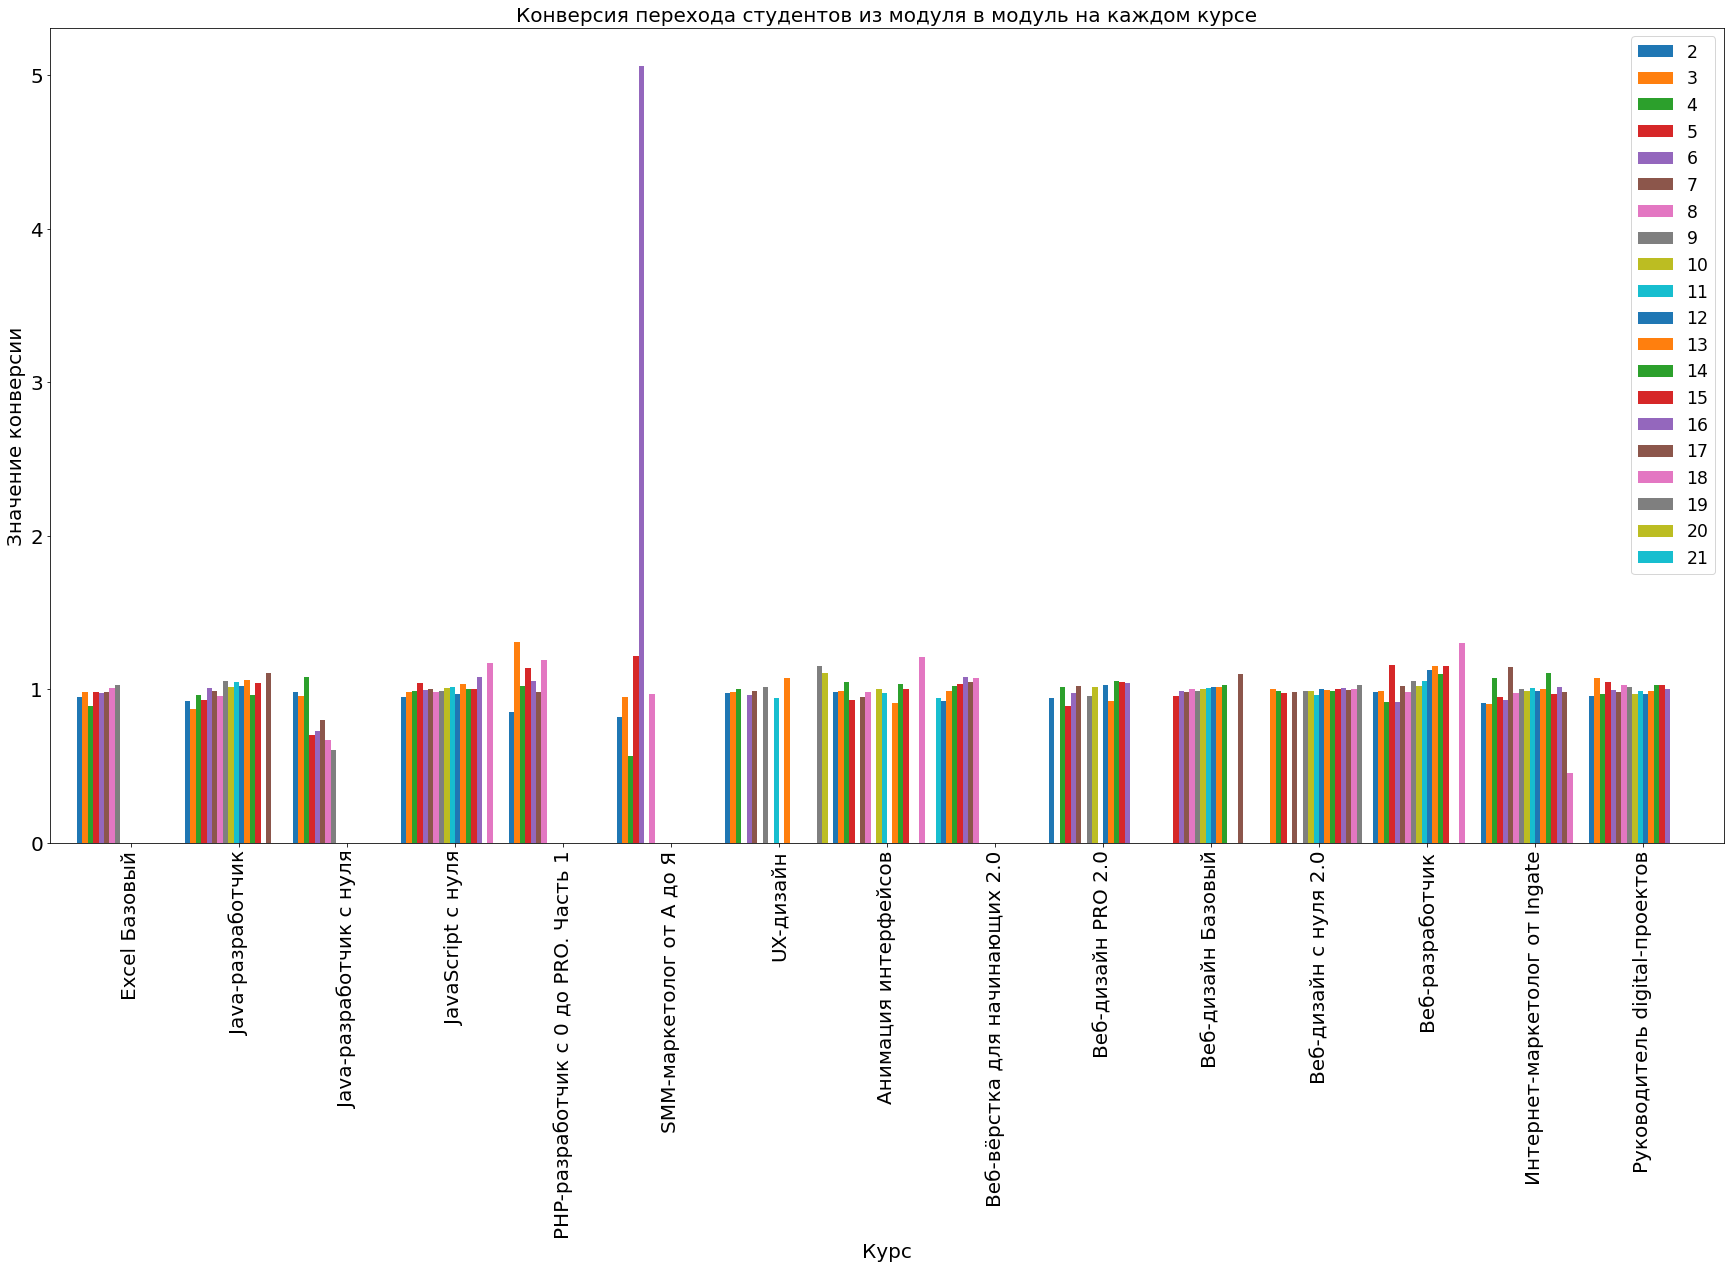

In [23]:
main4_2 = df4_1.pivot(index='title', columns='module_number', values='conversion')
main4_2.plot.bar(figsize=(30,15), fontsize=20, width=1)
plt.legend(fontsize='xx-large')
plt.xlabel('Курс', fontsize=20)
plt.ylabel('Значение конверсии', fontsize=20)
plt.xticks(rotation=90)
plt.title('Конверсия перехода студентов из модуля в модуль на каждом курсе', fontsize=20)
plt.show()

## Вывод по п.4

Конверсия перехода студентов в следующий модуль является достаточно высокой для каждого курса. Некоторые модули имеют нулевую конверсию, возможно это связано с ошибками в датасете или с высокой сложностью домашнего задания в предыдущем модуле. 
Также можно отметить, что некоторые модули имеют конверсию выше 1, что объясняется наличием возможности просматривать модули не по порядку.